# MLP Image Classifier

In [71]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
(X_train_complete, y_train_complete), (X_test, y_test) = cifar10.load_data()

In [72]:
print((X_train_complete.shape, y_train_complete.shape) , (X_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 1)) ((10000, 32, 32, 3), (10000, 1))


In [73]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

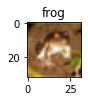

In [74]:
plt.figure(figsize = (1,1))
plt.imshow(X_train_complete[0])
plt.title(class_names[y_train_complete[0][0]]);

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_train_complete, y_train_complete, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [76]:
X_valid, X_train = X_train_complete[:]/255.0, X_train_complete[:]/255.0
y_valid, y_train = y_train_complete[:], y_train_complete[:]

In [77]:
X_train = X_train.flatten().reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test = X_test.flatten().reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
X_valid = X_valid.flatten().reshape(X_valid.shape[0], X_valid.shape[1]*X_valid.shape[2]*X_valid.shape[3])

In [78]:
print((X_train.shape, y_train.shape) , (X_test.shape,y_test.shape) , (X_valid.shape,y_valid.shape))

((50000, 3072), (50000, 1)) ((10000, 3072), (10000, 1)) ((50000, 3072), (50000, 1))


In [79]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras import losses
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [80]:
y_train_onehot = to_categorical(y_train, 10)
y_valid_onehot = to_categorical(y_valid, 10)

In [81]:
MLP = Sequential()
MLP.add(Dense(32*32*3, input_shape = (32*32*3,), kernel_initializer='he_uniform'))
MLP.add(Activation('relu'))

MLP.add(Dense(1024*4, kernel_initializer='he_uniform'))
MLP.add(Activation('relu'))
MLP.add(Dropout(0.4))

MLP.add(Dense(1024*8, kernel_initializer='he_uniform'))
MLP.add(Activation('relu'))
MLP.add(Dropout(0.4))

MLP.add(Dense(1024*4, kernel_initializer='he_uniform'))
MLP.add(Activation('relu'))
MLP.add(Dropout(0.4))

MLP.add(Dense(1024, kernel_initializer='he_uniform'))
MLP.add(Activation('relu'))
MLP.add(Dropout(0.4))

MLP.add(Dense(256, kernel_initializer='he_uniform'))
MLP.add(Activation('relu'))
MLP.add(Dropout(0.4))

MLP.add(Dense(10, kernel_initializer='he_uniform'))
MLP.add(Activation('softmax'))

optimizer = optimizers.Adam(learning_rate=0.00005)

MLP.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
MLP.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 3072)              9440256   
                                                                 
 activation_46 (Activation)  (None, 3072)              0         
                                                                 
 dense_47 (Dense)            (None, 4096)              12587008  
                                                                 
 activation_47 (Activation)  (None, 4096)              0         
                                                                 
 dropout_34 (Dropout)        (None, 4096)              0         
                                                                 
 dense_48 (Dense)            (None, 8192)              33562624  
                                                                 
 activation_48 (Activation)  (None, 8192)             

In [82]:
history = MLP.fit(X_train, y_train_onehot,
                 epochs=50,
                 batch_size=512,
                 validation_data=(X_valid, y_valid_onehot)) 

Epoch 1/50
98/98 [==============================] - 11s 108ms/step - loss: 2.3086 - accuracy: 0.1614 - val_loss: 1.9883 - val_accuracy: 0.2720
Epoch 2/50
98/98 [==============================] - 10s 102ms/step - loss: 2.0038 - accuracy: 0.2551 - val_loss: 1.8401 - val_accuracy: 0.3278
Epoch 3/50
98/98 [==============================] - 10s 106ms/step - loss: 1.8946 - accuracy: 0.3036 - val_loss: 1.7414 - val_accuracy: 0.3725
Epoch 4/50
98/98 [==============================] - 10s 105ms/step - loss: 1.8151 - accuracy: 0.3382 - val_loss: 1.6942 - val_accuracy: 0.4000
Epoch 5/50
98/98 [==============================] - 10s 105ms/step - loss: 1.7497 - accuracy: 0.3674 - val_loss: 1.6073 - val_accuracy: 0.4277
Epoch 6/50
98/98 [==============================] - 10s 105ms/step - loss: 1.7021 - accuracy: 0.3882 - val_loss: 1.5679 - val_accuracy: 0.4429
Epoch 7/50
98/98 [==============================] - 10s 106ms/step - loss: 1.6480 - accuracy: 0.4086 - val_loss: 1.5288 - val_accuracy: 0.4511

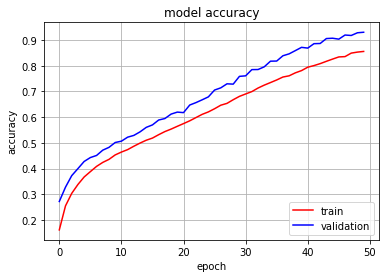

In [83]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

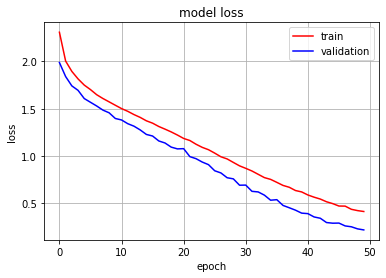

In [84]:
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

In [85]:
y_pred = MLP.predict(X_test);
y_pred = np.argmax(y_pred, axis=1);

313/313 [==============================] - 1s 3ms/step


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.62      0.91      0.74       986
  automobile       0.80      0.99      0.89       986
        bird       0.96      0.51      0.67      1038
         cat       0.76      0.81      0.78       989
        deer       0.98      0.40      0.57      1007
         dog       0.75      0.92      0.82       995
        frog       1.00      0.49      0.66       987
       horse       0.81      0.91      0.86      1012
        ship       0.90      0.87      0.89       978
       truck       0.66      0.99      0.79      1022

    accuracy                           0.78     10000
   macro avg       0.82      0.78      0.77     10000
weighted avg       0.82      0.78      0.77     10000



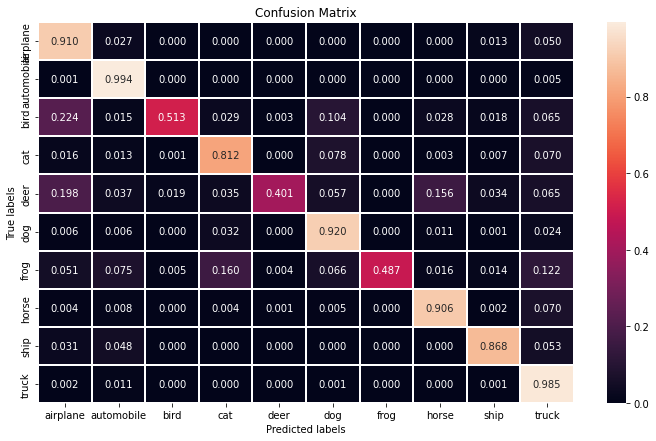

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
cm = confusion_matrix([class_names[int(y)] for y in y_test], [class_names[y] for y in y_pred], labels=class_names,normalize = 'true')
fig, ax = plt.subplots(figsize=(12,7)) ;
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='.3f');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);